In [22]:
import seaborn as sns
import pandas as pd
import numpy as np

In [23]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
table=pd.pivot_table(data=df, index=['sex'],values=["total_bill"])
table

,total_bill
sex,
Male,20.744076
Female,18.056897


In [25]:
table=pd.pivot_table(data=df, index=['sex','smoker'],values=["total_bill"])
table

total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [26]:
table=pd.pivot_table(data=df, index=['sex'])
table

,size,tip,total_bill
sex,,,
Male,2.630573,3.089618,20.744076
Female,2.459770,2.833448,18.056897


<AxesSubplot:xlabel='sex'>

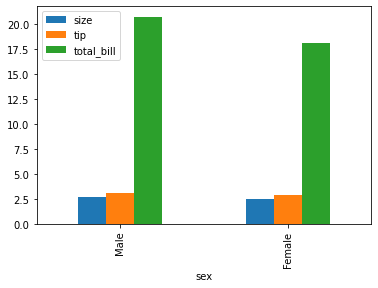

In [27]:
table.plot(kind='bar')

In [28]:
table=pd.pivot_table(df, index=['sex','smoker'])
table

size       tip  total_bill
sex    smoker                                
Male   Yes     2.500000  3.051167   22.284500
       No      2.711340  3.113402   19.791237
Female Yes     2.242424  2.931515   17.977879
       No      2.592593  2.773519   18.105185

In [29]:
table=pd.pivot_table(df, index=['sex','smoker'],aggfunc={'total_bill':'mean','size':'sum'})
table

size  total_bill
sex    smoker                  
Male   Yes      150   22.284500
       No       263   19.791237
Female Yes       74   17.977879
       No       140   18.105185

In [30]:
(263+140)/(150+263+74+140)

0.6427432216905901

In [31]:
table=pd.pivot_table(df, index=['sex','smoker'],values=["total_bill"],aggfunc=np.sum)
table

total_bill
sex    smoker            
Male   Yes        1337.07
       No         1919.75
Female Yes         593.27
       No          977.68

<AxesSubplot:xlabel='sex,smoker'>

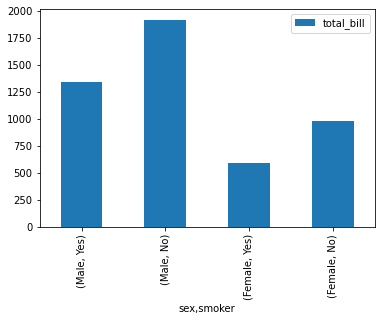

In [32]:
table.plot(kind='bar')

In [33]:
table=pd.pivot_table(df, index=['sex'],columns=['smoker'],values=["total_bill"],aggfunc=np.sum)
table

total_bill         
smoker        Yes       No
sex                       
Male      1337.07  1919.75
Female     593.27   977.68

<AxesSubplot:xlabel='sex'>

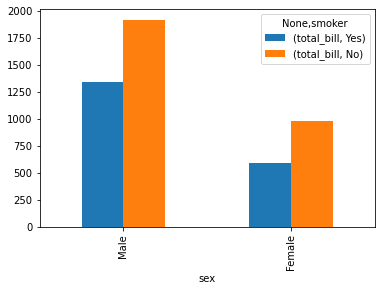

In [34]:
table.plot(kind='bar')

In [35]:
table=pd.pivot_table(df, index=['sex','smoker','time'],columns=['day'],values=["total_bill"],aggfunc=np.sum)
table

total_bill                        
day                        Thur     Fri     Sat     Sun
sex    smoker time                                     
Male   Yes    Lunch      191.71   34.16    0.00    0.00
              Dinner       0.00  129.46  589.62  392.12
       No     Lunch      369.73    0.00    0.00    0.00
              Dinner       0.00   34.95  637.73  877.34
Female Yes    Lunch      134.53   39.78    0.00    0.00
              Dinner       0.00   48.80  304.00   66.16
       No     Lunch      381.58   15.98    0.00    0.00
              Dinner      18.78   22.75  247.05  291.54

In [36]:
# Handling null values
table=pd.pivot_table(df, index=['sex','smoker','time'],columns=['day'],values=["total_bill"],aggfunc=np.sum,fill_value=0)
table

total_bill                        
day                        Thur     Fri     Sat     Sun
sex    smoker time                                     
Male   Yes    Lunch      191.71   34.16    0.00    0.00
              Dinner       0.00  129.46  589.62  392.12
       No     Lunch      369.73    0.00    0.00    0.00
              Dinner       0.00   34.95  637.73  877.34
Female Yes    Lunch      134.53   39.78    0.00    0.00
              Dinner       0.00   48.80  304.00   66.16
       No     Lunch      381.58   15.98    0.00    0.00
              Dinner      18.78   22.75  247.05  291.54

In [37]:
# Handling null values
table=pd.pivot_table(df, index=['sex','smoker','day'],columns=['time'],
                     aggfunc={'size':'sum','total_bill':'sum'},fill_value=0)
table

size        total_bill        
time               Lunch Dinner      Lunch  Dinner
sex    smoker day                                 
Male   Yes    Thur    23      0     191.71    0.00
              Fri      5     12      34.16  129.46
              Sat      0     71       0.00  589.62
              Sun      0     39       0.00  392.12
       No     Thur    50      0     369.73    0.00
              Fri      0      4       0.00   34.95
              Sat      0     85       0.00  637.73
              Sun      0    124       0.00  877.34
Female Yes    Thur    17      0     134.53    0.00
              Fri      6      8      39.78   48.80
              Sat      0     33       0.00  304.00
              Sun      0     10       0.00   66.16
       No     Thur    60      2     381.58   18.78
              Fri      3      2      15.98   22.75
              Sat      0     30       0.00  247.05
              Sun      0     43       0.00  291.54

In [38]:
table.query('sex==["Male"]')

size        total_bill        
time             Lunch Dinner      Lunch  Dinner
sex  smoker day                                 
Male Yes    Thur    23      0     191.71    0.00
            Fri      5     12      34.16  129.46
            Sat      0     71       0.00  589.62
            Sun      0     39       0.00  392.12
     No     Thur    50      0     369.73    0.00
            Fri      0      4       0.00   34.95
            Sat      0     85       0.00  637.73
            Sun      0    124       0.00  877.34

In [39]:
table.query('smoker==["Yes"]')

size        total_bill        
time               Lunch Dinner      Lunch  Dinner
sex    smoker day                                 
Male   Yes    Thur    23      0     191.71    0.00
              Fri      5     12      34.16  129.46
              Sat      0     71       0.00  589.62
              Sun      0     39       0.00  392.12
Female Yes    Thur    17      0     134.53    0.00
              Fri      6      8      39.78   48.80
              Sat      0     33       0.00  304.00
              Sun      0     10       0.00   66.16

In [40]:
table.query('day==["Sat","Sun"]')

size        total_bill        
time              Lunch Dinner      Lunch  Dinner
sex    smoker day                                
Male   Yes    Sat     0     71        0.0  589.62
              Sun     0     39        0.0  392.12
       No     Sat     0     85        0.0  637.73
              Sun     0    124        0.0  877.34
Female Yes    Sat     0     33        0.0  304.00
              Sun     0     10        0.0   66.16
       No     Sat     0     30        0.0  247.05
              Sun     0     43        0.0  291.54